## 0. Attention degree normalization

### 0.1 Log-scale normalization

In [12]:
import pandas as pd
import numpy as np
map_all_gene_AD_Att_deg_pvalue_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-AD-Att_deg_pvalue.csv')
# map_all_gene_AD_Att_deg_pvalue_df.drop('log_normalized_Att_deg', axis=1, inplace=True)
map_all_gene_AD_Att_deg_pvalue_df.drop('high_eq_Att_deg', axis=1, inplace=True)
map_all_gene_AD_Att_deg_pvalue_df = map_all_gene_AD_Att_deg_pvalue_df.sort_values(by='Att_deg', ascending=True)
display(map_all_gene_AD_Att_deg_pvalue_df)
attetion_degree_list = map_all_gene_AD_Att_deg_pvalue_df['Att_deg'].tolist()
print(attetion_degree_list)
# Convert list to array and add 1.0 to all elements (to prevent issues with zero)
attetion_degree_array = np.array(attetion_degree_list) + 1.0
# Sort the attention degree array
sorted_values = np.sort(attetion_degree_array)
# Calculate the CDF for histogram equalization
n = len(attetion_degree_array)
ranks = np.arange(1, n + 1)
cdf = ranks / n
# Min and Max values from the array
min_val = np.min(attetion_degree_array)
max_val = np.max(attetion_degree_array)
# Apply the histogram equalization formula to map CDF values to new values
hist_eq_array = min_val + cdf * (max_val - min_val)
# Print the result of histogram equalization applied to attetion_degree_array
print("Original Attention Degree Array:", attetion_degree_array)
print("Histogram Equalized Array:", hist_eq_array)
print(hist_eq_array)
# adjust the column (if 'high_eq_Att_deg' existed, replace with new values)
if 'high_eq_Att_deg' in map_all_gene_AD_Att_deg_pvalue_df.columns:
    map_all_gene_AD_Att_deg_pvalue_df['high_eq_Att_deg'] = hist_eq_array
else:
    map_all_gene_AD_Att_deg_pvalue_df.insert(2, 'high_eq_Att_deg', hist_eq_array)
display(map_all_gene_AD_Att_deg_pvalue_df)

,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
351,351,CHD8,0.006225,1.000000,0.170654,0.467379,0.014400,0.079069,1.000000,1.0,1.000000,0.893847,1.0
767,767,GPER1,0.006400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.021890,1.0
653,653,FLNA,0.007212,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.914610,1.0
437,437,CTNNBIP1,0.007670,0.944909,0.099659,1.000000,1.000000,0.308939,0.246811,1.0,1.000000,0.221564,1.0
1467,1467,PIN1,0.007749,1.000000,0.220667,0.230706,0.683672,0.447189,1.000000,1.0,1.000000,0.025413,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1.0,1.000000,0.535569,1.0
67,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1.0,1.000000,0.516907,1.0
560,560,EGFR,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1.0,1.000000,0.635365,1.0
1202,1202,MAPK1,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1.0,0.253030,0.016100,1.0


[0.006225424853125, 0.0064000596648381, 0.0072119967228906, 0.0076695050125, 0.0077492286280312, 0.0079199146132812, 0.00827010459075, 0.0088323889309305, 0.0094822716851562, 0.009539153571875, 0.0095529490019531, 0.0096322250984374, 0.0100015455443791, 0.0100621961185937, 0.0103345863601562, 0.0103369444391637, 0.0106982964476562, 0.0107429622187499, 0.0108132761046875, 0.0108978123960937, 0.0112835083448659, 0.0115447030594657, 0.0117165249671875, 0.0118090767516333, 0.0119471258675919, 0.0121652246539062, 0.0123801952289062, 0.0127441948226496, 0.012755883140625, 0.012795989290625, 0.0128664338726562, 0.0128911571210937, 0.013070746028125, 0.01314578769375, 0.0131782853671875, 0.013382444203125, 0.013655064359375, 0.0137563846367187, 0.0138272081015625, 0.0139027929492187, 0.0139469396445312, 0.0139573512226562, 0.0140703672265625, 0.0141482363320312, 0.0143185254646093, 0.0143759266, 0.0143896821695312, 0.0144784815804687, 0.014525524921875, 0.0145708208313843, 0.0145824847304687, 

,Gene_num,Gene_name,high_eq_Att_deg,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
351,351,CHD8,1.010226,0.006225,1.000000,0.170654,0.467379,0.014400,0.079069,1.000000,1.0,1.000000,0.893847,1.0
767,767,GPER1,1.014226,0.006400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.021890,1.0
653,653,FLNA,1.018226,0.007212,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.914610,1.0
437,437,CTNNBIP1,1.022226,0.007670,0.944909,0.099659,1.000000,1.000000,0.308939,0.246811,1.0,1.000000,0.221564,1.0
1467,1467,PIN1,1.026227,0.007749,1.000000,0.220667,0.230706,0.683672,0.447189,1.000000,1.0,1.000000,0.025413,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,AKT1,9.386737,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1.0,1.000000,0.535569,1.0
67,67,AKT2,9.390737,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1.0,1.000000,0.516907,1.0
560,560,EGFR,9.394738,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1.0,1.000000,0.635365,1.0
1202,1202,MAPK1,9.398738,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1.0,0.253030,0.016100,1.0


## 1. Top genes visualization with pvalues

### 1.1 Barplot of the attention degree for genes

In [13]:
import pandas as pd
# Read node weight
AD_refilter_node_weight_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/average_attention_AD_refilter_node_weight_df.csv')
display(AD_refilter_node_weight_df)
map_all_gene_AD_Att_deg_pvalue_tmp_df = map_all_gene_AD_Att_deg_pvalue_df[['Gene_name', 'high_eq_Att_deg']]
AD_refilter_node_weight_df = pd.merge(AD_refilter_node_weight_df, map_all_gene_AD_Att_deg_pvalue_tmp_df, on='Gene_name', how='left')
display(AD_refilter_node_weight_df)
AD_sort_refilter_node_weight_df = AD_refilter_node_weight_df.sort_values(by=['high_eq_Att_deg'], ascending=False).reset_index(drop=True)
display(AD_sort_refilter_node_weight_df)

,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1,1.000000,0.535569,1
1,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1,1.000000,0.516907,1
2,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1,0.408491,0.041859,1
3,81,APAF1,0.122176,1.000000,1.000000,0.798755,1.000000,0.952498,1.000000,1,0.057045,0.026357,1
4,94,ARAF,0.893171,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,0.093908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1867,SPHK1,0.913301,1.000000,0.765819,0.751311,0.813513,0.376688,1.000000,1,1.000000,0.423329,1
97,1871,SPP1,0.242150,1.000000,0.195715,0.291161,1.000000,0.228857,1.000000,1,1.000000,0.895733,1
98,1915,TBC1D4,0.232336,0.018444,0.666261,0.615127,1.000000,0.649028,1.000000,1,1.000000,0.053593,1
99,2021,TSC1,1.469850,1.000000,0.776754,1.000000,1.000000,0.588581,1.000000,1,1.000000,0.173642,1


,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues,high_eq_Att_deg
0,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1,1.000000,0.535569,1,9.386737
1,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1,1.000000,0.516907,1,9.390737
2,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1,0.408491,0.041859,1,9.402738
3,81,APAF1,0.122176,1.000000,1.000000,0.798755,1.000000,0.952498,1.000000,1,0.057045,0.026357,1,4.182419
4,94,ARAF,0.893171,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,0.093908,1,7.890646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1867,SPHK1,0.913301,1.000000,0.765819,0.751311,0.813513,0.376688,1.000000,1,1.000000,0.423329,1,7.938649
97,1871,SPP1,0.242150,1.000000,0.195715,0.291161,1.000000,0.228857,1.000000,1,1.000000,0.895733,1,5.486499
98,1915,TBC1D4,0.232336,0.018444,0.666261,0.615127,1.000000,0.649028,1.000000,1,1.000000,0.053593,1,5.390493
99,2021,TSC1,1.469850,1.000000,0.776754,1.000000,1.000000,0.588581,1.000000,1,1.000000,0.173642,1,8.650692


,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues,high_eq_Att_deg
0,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1,0.408491,0.041859,1,9.402738
1,1202,MAPK1,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1,0.253030,0.016100,1,9.398738
2,560,EGFR,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1,1.000000,0.635365,1,9.394738
3,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1,1.000000,0.516907,1,9.390737
4,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1,1.000000,0.535569,1,9.386737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1560,PPP2R5D,0.148139,1.000000,0.433077,0.754930,0.676687,0.747698,1.000000,1,1.000000,0.225191,1,4.458436
97,1559,PPP2R5C,0.139134,0.608441,0.854425,0.077455,0.681923,0.780409,1.000000,1,1.000000,0.000068,1,4.362430
98,1558,PPP2R5B,0.138631,1.000000,0.649028,0.628594,1.000000,0.497078,1.000000,1,1.000000,0.219770,1,4.358430
99,551,EEF2,0.132360,1.000000,0.751311,0.578765,0.773104,0.711880,1.000000,1,1.000000,0.032958,1,4.294426


In [14]:
# Read p values
import os
pval_df_list = []
for file_name in os.listdir('./ROSMAP-analysis/node_analysis_processed/pvalues'):
    if file_name.endswith('.csv'):
        pval_df = pd.read_csv('./ROSMAP-analysis/node_analysis_processed/pvalues/' + file_name)
        # fetch the file name after the second '-'
        pval_df.columns = ['gene_name', file_name.split('-', 2)[2].split('.')[0]]
        pval_df_list.append(pval_df)
# Concate files in horizontal
all_pval_df = pd.concat(pval_df_list, axis=1)
# Drop duplicated gene_name columns
all_pval_df = all_pval_df.loc[:,~all_pval_df.columns.duplicated()]
display(all_pval_df)

,gene_name,cnv_del_pvalues,cnv_dup_pvalues,cnv_mcnv_pvalues,gene-expression_pvalues,methy-Core-Promoter_pvalues,methy-Distal-Promoter_pvalues,methy-Downstream_pvalues,methy-Proximal-Promoter_pvalues,methy-Upstream_pvalues,proteomics_pvalues
0,ABL1,1.000000,1.0,0.175639,0.107218,0.813513,0.001904,0.751311,0.979089,0.341740,1.0
1,ABL2,1.000000,1.0,0.012679,0.735079,1.000000,0.166236,0.278289,0.850688,1.000000,1.0
2,ACAA1,1.000000,1.0,1.000000,0.922175,0.202383,1.000000,0.540288,0.083222,1.000000,1.0
3,ACACA,0.288826,1.0,1.000000,1.000000,1.000000,0.832054,0.204075,0.956294,1.000000,1.0
4,ACACB,1.000000,1.0,1.000000,0.678429,1.000000,0.506179,0.389686,0.787733,0.267863,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2094,ZFYVE16,1.000000,1.0,1.000000,0.037288,1.000000,0.115251,0.212691,0.795076,0.313493,1.0
2095,ZFYVE9,1.000000,1.0,1.000000,0.244905,1.000000,0.452906,0.336922,0.880673,0.189211,1.0
2096,ZMAT3,1.000000,1.0,0.324931,0.618479,1.000000,0.400278,0.232565,0.718996,1.000000,1.0
2097,ZNF274,1.000000,1.0,1.000000,0.073907,1.000000,0.582028,0.773104,1.000000,1.000000,1.0


In [16]:
pval_ordered_col_list = ['proteomics_pvalues', 'gene-expression_pvalues', 'cnv_del_pvalues', 'cnv_dup_pvalues', 'cnv_mcnv_pvalues', 
                         'methy-Downstream_pvalues', 'methy-Core-Promoter_pvalues', 'methy-Proximal-Promoter_pvalues', 'methy-Distal-Promoter_pvalues', 'methy-Upstream_pvalues']
# reversed order
pval_reversed_ordered_col_list = pval_ordered_col_list[::-1]
df_pval_reversed_ordered_col_list = ['gene_name'] + pval_reversed_ordered_col_list
all_ordered_pval_df = all_pval_df[df_pval_reversed_ordered_col_list]

# replace all '-' with '_' in column names
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.replace('-', '_')
# replaced with lower case
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.lower()
# replace 'proteomics' with 'protein_expression'
all_ordered_pval_df.columns = all_ordered_pval_df.columns.str.replace('proteomics', 'protein_expression')
display(all_ordered_pval_df)

# merge with all att_deg dataframes
AD_all_gene_Att_deg_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-AD-Att_deg.csv')
AD_all_gene_Att_deg_df = AD_all_gene_Att_deg_df.sort_values(by='Att_deg', ascending=True)
AD_all_gene_Att_deg_df.insert(2, 'high_eq_Att_deg', hist_eq_array)
AD_all_gene_Att_deg_pvalue_df = pd.merge(AD_all_gene_Att_deg_df, all_ordered_pval_df, left_on='Gene_name', right_on='gene_name', how='left')
AD_all_gene_Att_deg_pvalue_df = AD_all_gene_Att_deg_pvalue_df.drop(columns=['gene_name'])
display(AD_all_gene_Att_deg_pvalue_df)
AD_all_gene_Att_deg_pvalue_df.to_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-AD-Att_deg_pvalue.csv', index=False)

noAD_all_gene_Att_deg_df = pd.read_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-NOAD-Att_deg.csv')
noAD_all_gene_Att_deg_df = noAD_all_gene_Att_deg_df.sort_values(by='Att_deg', ascending=True)
noAD_all_gene_Att_deg_df.insert(2, 'high_eq_Att_deg', hist_eq_array)
noAD_all_gene_Att_deg_pvalue_df = pd.merge(noAD_all_gene_Att_deg_df, all_ordered_pval_df, left_on='Gene_name', right_on='gene_name', how='left')
noAD_all_gene_Att_deg_pvalue_df = noAD_all_gene_Att_deg_pvalue_df.drop(columns=['gene_name'])
display(noAD_all_gene_Att_deg_pvalue_df)
noAD_all_gene_Att_deg_pvalue_df.to_csv('./ROSMAP-analysis/avg_analysis/map-all-gene-NOAD-Att_deg_pvalue.csv', index=False)


,gene_name,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,ABL1,0.341740,0.001904,0.979089,0.813513,0.751311,0.175639,1.0,1.000000,0.107218,1.0
1,ABL2,1.000000,0.166236,0.850688,1.000000,0.278289,0.012679,1.0,1.000000,0.735079,1.0
2,ACAA1,1.000000,1.000000,0.083222,0.202383,0.540288,1.000000,1.0,1.000000,0.922175,1.0
3,ACACA,1.000000,0.832054,0.956294,1.000000,0.204075,1.000000,1.0,0.288826,1.000000,1.0
4,ACACB,0.267863,0.506179,0.787733,1.000000,0.389686,1.000000,1.0,1.000000,0.678429,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2094,ZFYVE16,0.313493,0.115251,0.795076,1.000000,0.212691,1.000000,1.0,1.000000,0.037288,1.0
2095,ZFYVE9,0.189211,0.452906,0.880673,1.000000,0.336922,1.000000,1.0,1.000000,0.244905,1.0
2096,ZMAT3,1.000000,0.400278,0.718996,1.000000,0.232565,0.324931,1.0,1.000000,0.618479,1.0
2097,ZNF274,1.000000,0.582028,1.000000,1.000000,0.773104,1.000000,1.0,1.000000,0.073907,1.0


,Gene_num,Gene_name,high_eq_Att_deg,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,351,CHD8,1.010226,0.006225,1.000000,0.170654,0.467379,0.014400,0.079069,1.000000,1.0,1.000000,0.893847,1.0
1,767,GPER1,1.014226,0.006400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.021890,1.0
2,653,FLNA,1.018226,0.007212,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.914610,1.0
3,437,CTNNBIP1,1.022226,0.007670,0.944909,0.099659,1.000000,1.000000,0.308939,0.246811,1.0,1.000000,0.221564,1.0
4,1467,PIN1,1.026227,0.007749,1.000000,0.220667,0.230706,0.683672,0.447189,1.000000,1.0,1.000000,0.025413,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,65,AKT1,9.386737,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1.0,1.000000,0.535569,1.0
2095,67,AKT2,9.390737,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1.0,1.000000,0.516907,1.0
2096,560,EGFR,9.394738,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1.0,1.000000,0.635365,1.0
2097,1202,MAPK1,9.398738,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1.0,0.253030,0.016100,1.0


,Gene_num,Gene_name,high_eq_Att_deg,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues
0,767,GPER1,1.010226,0.005937,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.021890,1.0
1,351,CHD8,1.014226,0.006438,1.000000,0.170654,0.467379,0.014400,0.079069,1.000000,1.0,1.000000,0.893847,1.0
2,653,FLNA,1.018226,0.007835,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.914610,1.0
3,437,CTNNBIP1,1.022226,0.007991,0.944909,0.099659,1.000000,1.000000,0.308939,0.246811,1.0,1.000000,0.221564,1.0
4,1467,PIN1,1.026227,0.008121,1.000000,0.220667,0.230706,0.683672,0.447189,1.000000,1.0,1.000000,0.025413,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,65,AKT1,9.386737,6.084683,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1.0,1.000000,0.535569,1.0
2095,67,AKT2,9.390737,6.274701,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1.0,1.000000,0.516907,1.0
2096,560,EGFR,9.394738,6.672193,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1.0,1.000000,0.635365,1.0
2097,1202,MAPK1,9.398738,8.018402,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1.0,0.253030,0.016100,1.0


In [17]:
AD_sort_refilter_node_weight_df

,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues,high_eq_Att_deg
0,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1,0.408491,0.041859,1,9.402738
1,1202,MAPK1,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1,0.253030,0.016100,1,9.398738
2,560,EGFR,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1,1.000000,0.635365,1,9.394738
3,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1,1.000000,0.516907,1,9.390737
4,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1,1.000000,0.535569,1,9.386737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1560,PPP2R5D,0.148139,1.000000,0.433077,0.754930,0.676687,0.747698,1.000000,1,1.000000,0.225191,1,4.458436
97,1559,PPP2R5C,0.139134,0.608441,0.854425,0.077455,0.681923,0.780409,1.000000,1,1.000000,0.000068,1,4.362430
98,1558,PPP2R5B,0.138631,1.000000,0.649028,0.628594,1.000000,0.497078,1.000000,1,1.000000,0.219770,1,4.358430
99,551,EEF2,0.132360,1.000000,0.751311,0.578765,0.773104,0.711880,1.000000,1,1.000000,0.032958,1,4.294426


In [25]:
AD_sort_refilter_node_weight_df.to_csv('./test.csv', index=False)

In [18]:
# Merge
AD_sort_refilter_node_weight_pval_df = AD_sort_refilter_node_weight_df.copy()
display(AD_sort_refilter_node_weight_pval_df)
pval_col_list = list(AD_sort_refilter_node_weight_pval_df.columns)[3:-1]
print(pval_col_list)

,Gene_num,Gene_name,Att_deg,methy_upstream_pvalues,methy_distal_promoter_pvalues,methy_proximal_promoter_pvalues,methy_core_promoter_pvalues,methy_downstream_pvalues,cnv_mcnv_pvalues,cnv_dup_pvalues,cnv_del_pvalues,gene_expression_pvalues,protein_expression_pvalues,high_eq_Att_deg
0,68,AKT3,8.402738,0.221567,0.007778,1.000000,1.000000,0.055699,0.399471,1,0.408491,0.041859,1,9.402738
1,1202,MAPK1,7.798475,1.000000,0.861910,0.470303,1.000000,0.234434,1.000000,1,0.253030,0.016100,1,9.398738
2,560,EGFR,6.725241,0.003907,0.598474,1.000000,1.000000,0.929747,0.566741,1,1.000000,0.635365,1,9.394738
3,67,AKT2,6.275843,0.369019,0.269926,0.405638,0.055092,0.079886,1.000000,1,1.000000,0.516907,1,9.390737
4,65,AKT1,6.115870,0.820917,0.873159,0.018209,1.000000,0.929747,1.000000,1,1.000000,0.535569,1,9.386737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1560,PPP2R5D,0.148139,1.000000,0.433077,0.754930,0.676687,0.747698,1.000000,1,1.000000,0.225191,1,4.458436
97,1559,PPP2R5C,0.139134,0.608441,0.854425,0.077455,0.681923,0.780409,1.000000,1,1.000000,0.000068,1,4.362430
98,1558,PPP2R5B,0.138631,1.000000,0.649028,0.628594,1.000000,0.497078,1.000000,1,1.000000,0.219770,1,4.358430
99,551,EEF2,0.132360,1.000000,0.751311,0.578765,0.773104,0.711880,1.000000,1,1.000000,0.032958,1,4.294426


['methy_upstream_pvalues', 'methy_distal_promoter_pvalues', 'methy_proximal_promoter_pvalues', 'methy_core_promoter_pvalues', 'methy_downstream_pvalues', 'cnv_mcnv_pvalues', 'cnv_dup_pvalues', 'cnv_del_pvalues', 'gene_expression_pvalues', 'protein_expression_pvalues']


#### 1.1.1 Barplot of the horizontal

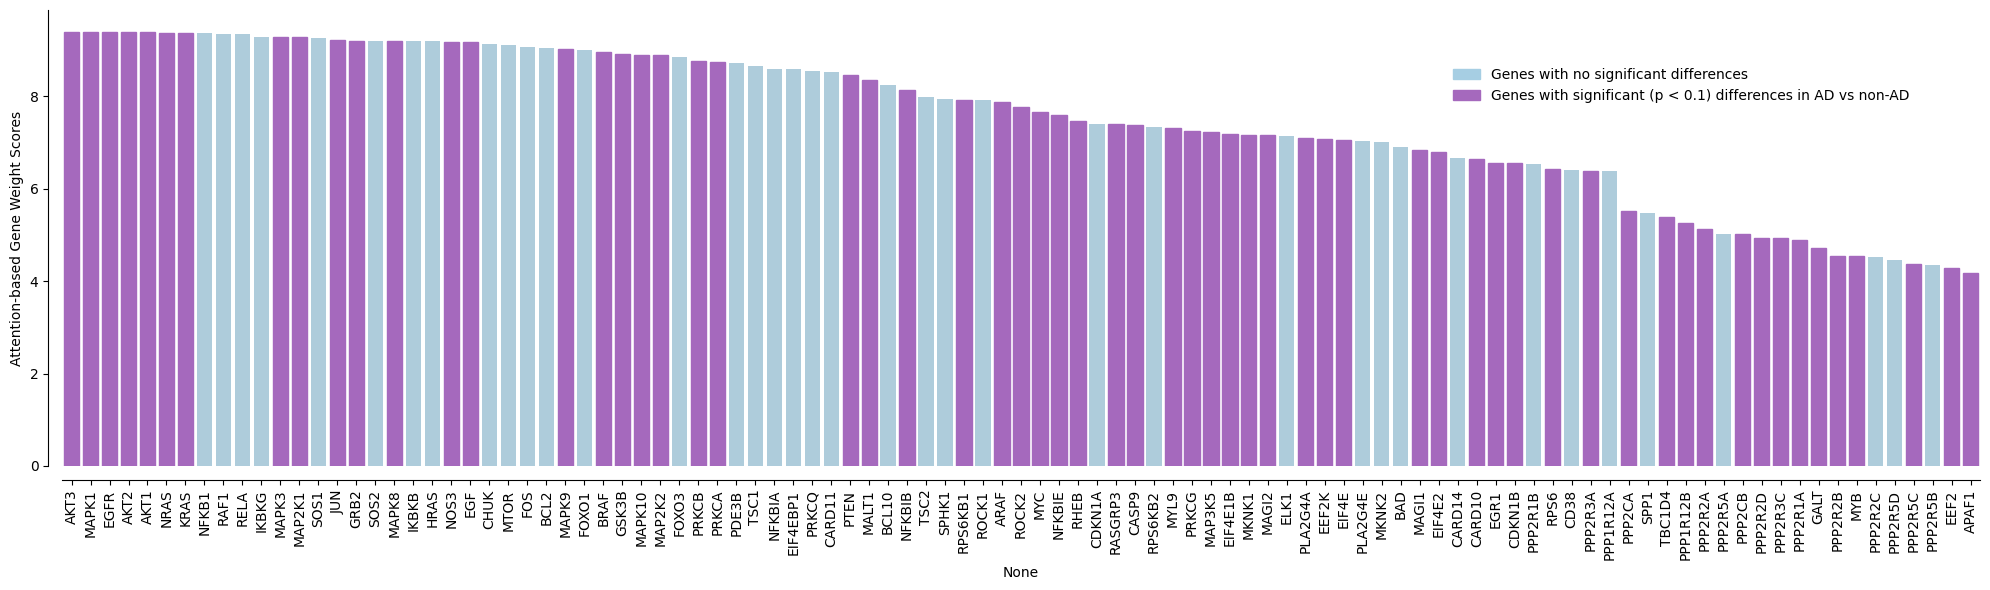

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 6))
# Create a horizontal bar plot for column A
barplot = sns.barplot(y=AD_sort_refilter_node_weight_pval_df['high_eq_Att_deg'], x=AD_sort_refilter_node_weight_pval_df.index, color='#A6CEE3')  # uniform color for all bars

# Loop through the bars and highlight the ones where column B value is lower than 0.1
for idx, bar in enumerate(barplot.patches):
    # if AD_sort_refilter_node_weight_pval_df['gene-expression_pvalues'][idx] < 0.1:
    #     bar.set_color('#CAB2D6')  # This will set the color of the bar to red if the condition is met
    for pval_col in pval_col_list:
        if AD_sort_refilter_node_weight_pval_df[pval_col][idx] < 0.1:
            # bar.set_color('#CAB2D6')  # This will set the color of the bar to red if the condition is met
            bar.set_color('#a569bd')  # This will set the color of the bar to red if the condition is met

# # Add horizontal line at y=2.0 with tomato color, bold and dotted line
# plt.axhline(y=np.log2(1+2), color='tomato', linestyle='--', linewidth=2.5)  # Dashed line, bold (linewidth=2.5)

# Change y-axis label
plt.ylabel('Attention-based Gene Weight Scores')
# Adjust the y-axis spine to bring the zero a little higher
barplot.spines['left'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it up
barplot.spines['left'].set_color('black')  # Change the color

# Also adjust the x-axis spine to bring the zero a little to the left
barplot.spines['bottom'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it to the left

# Assuming 'OtherColumn' is the name of the other column whose values you want to use as x-labels
plt.xticks(ticks=range(len(AD_sort_refilter_node_weight_pval_df)), labels=AD_sort_refilter_node_weight_pval_df['Gene_name'].tolist(), rotation=90)
sns.despine(left=False, bottom=False, top=True, right=True)

# Create legend patches
legend_patches = [mpatches.Patch(color='#A6CEE3', label='Genes with no significant differences'),
                  mpatches.Patch(color='#a569bd', label='Genes with significant (p < 0.1) differences in AD vs non-AD')]

# # Create a custom legend entry for the horizontal dotted line
# line_legend = mlines.Line2D([], [], color='tomato', linestyle='--', linewidth=2.5, label='Important genes threshold (Attention-based weight > 2.0)')

# # Add the dotted line legend to the existing legend patches
# legend_patches.append(line_legend)

# Add legend to the barplot with specific location and remove the border
barplot.legend(handles=legend_patches, 
               loc='upper right', 
               bbox_to_anchor=(0.97, 0.9),  # Adjust the position to control the vertical placement
               frameon=False)  # Remove the border around the legend

# Show the plot
# plt.show()

# Apply tight layout before saving
plt.tight_layout()

# Save the plot with high DPI and ensure the full image is saved
plt.savefig('./avg_AD_refilter_node_weight_pval_barplot.png', dpi=600, bbox_inches='tight')


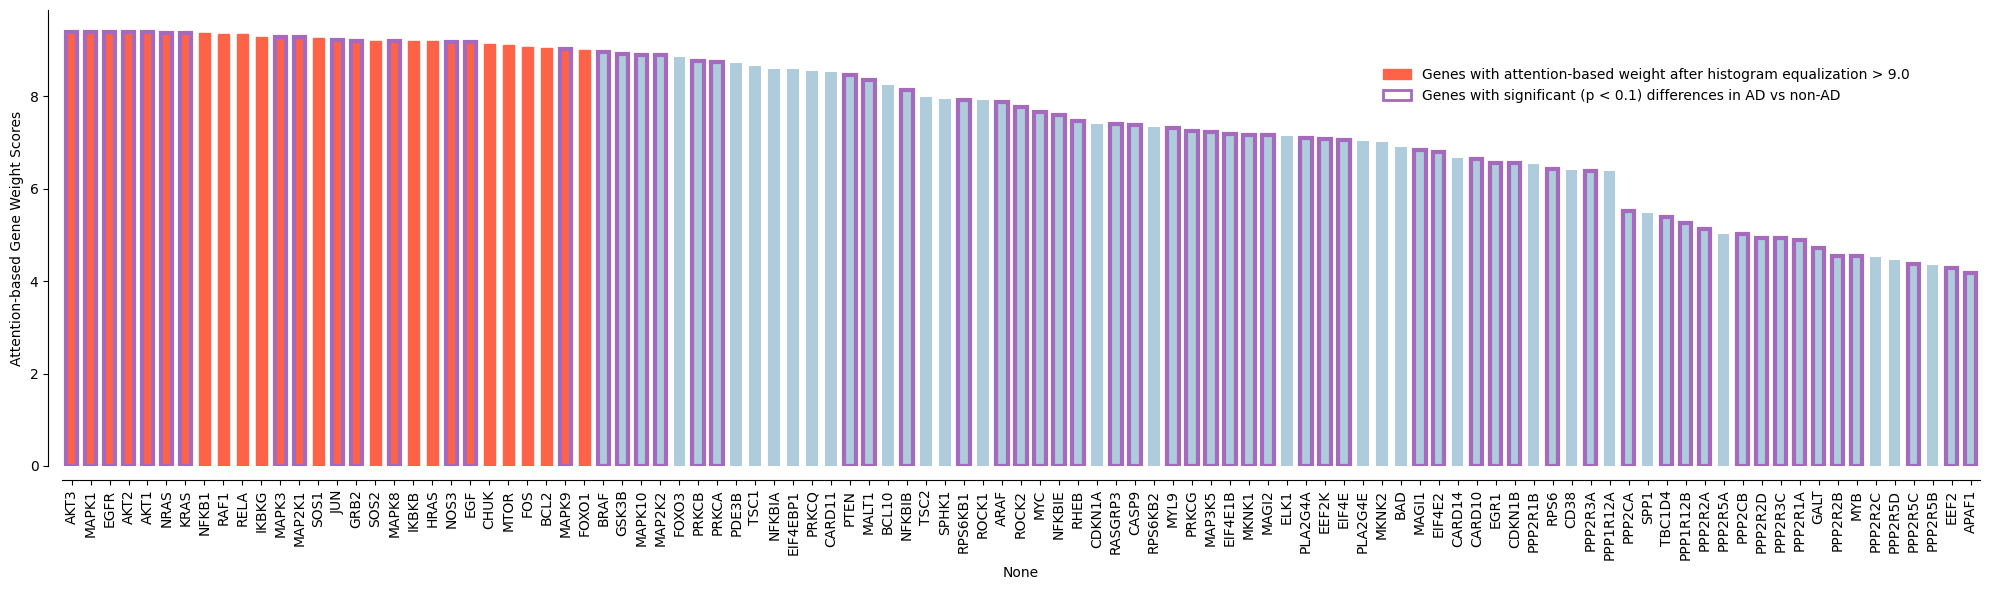

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def create_custom_barplot(dataframe, pval_col_list, save_path):
    plt.figure(figsize=(20, 6))

    # Create a horizontal bar plot for column A
    barplot = sns.barplot(y=dataframe['high_eq_Att_deg'], x=dataframe.index, color='#A6CEE3', width=0.6)  # uniform color for all bars

    # Loop through the bars and highlight the ones where conditions are met
    for idx, bar in enumerate(barplot.patches):
        # Highlight bars where attention degree is greater than 2.0
        if dataframe['high_eq_Att_deg'][idx] > 8.99:
            bar.set_color('tomato')  # Set the bar color to tomato
        # Highlight bars where p-value is less than 0.1
        for pval_col in pval_col_list:
            if dataframe[pval_col][idx] < 0.1:
                bar.set_edgecolor('#a569bd')  # Add a frame color for significant p-values
                bar.set_linewidth(3.0)  # Set the width of the frame

    # Add horizontal line at y=2.0 with tomato color, bold and dotted line
    # plt.axhline(y=2.0, color='tomato', linestyle='--', linewidth=2.5)  # Dashed line, bold (linewidth=2.5)

    # Change y-axis label
    plt.ylabel('Attention-based Gene Weight Scores')

    # Adjust the y-axis spine to bring the zero a little higher
    barplot.spines['left'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it up
    barplot.spines['left'].set_color('black')  # Change the color

    # Also adjust the x-axis spine to bring the zero a little to the left
    barplot.spines['bottom'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it to the left

    # Set x-ticks with gene names
    plt.xticks(ticks=range(len(dataframe)), labels=dataframe['Gene_name'].tolist(), rotation=90)

    # Remove unnecessary spines
    sns.despine(left=False, bottom=False, top=True, right=True)

    # Create legend patches
    legend_patches = [
        # mpatches.Patch(color='#A6CEE3', label='Genes with no significant differences'),
        mpatches.Patch(color='tomato', label='Genes with attention-based weight after histogram equalization > 9.0'),
        mpatches.Patch(facecolor='none', edgecolor='#a569bd', linewidth=2.0, label='Genes with significant (p < 0.1) differences in AD vs non-AD')  # Border-only patch
    ]

    # # Create a custom legend entry for the horizontal dotted line
    # line_legend = mlines.Line2D([], [], color='tomato', linestyle='--', linewidth=2.5, label='Important genes threshold (Attention-based weight > 2.0)')

    # # Add the dotted line legend to the existing legend patches
    # legend_patches.append(line_legend)

    # Add legend to the barplot with specific location and remove the border
    barplot.legend(handles=legend_patches, 
                   loc='upper right', 
                   bbox_to_anchor=(0.97, 0.9),  # Adjust the position to control the vertical placement
                   frameon=False)  # Remove the border around the legend

    # Apply tight layout before saving
    plt.tight_layout()

    # Save the plot with high DPI and ensure the full image is saved
    plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Example of how to call the function
create_custom_barplot(AD_sort_refilter_node_weight_pval_df, pval_col_list, './avg_AD_refilter_node_weight_pval_barplot.png')


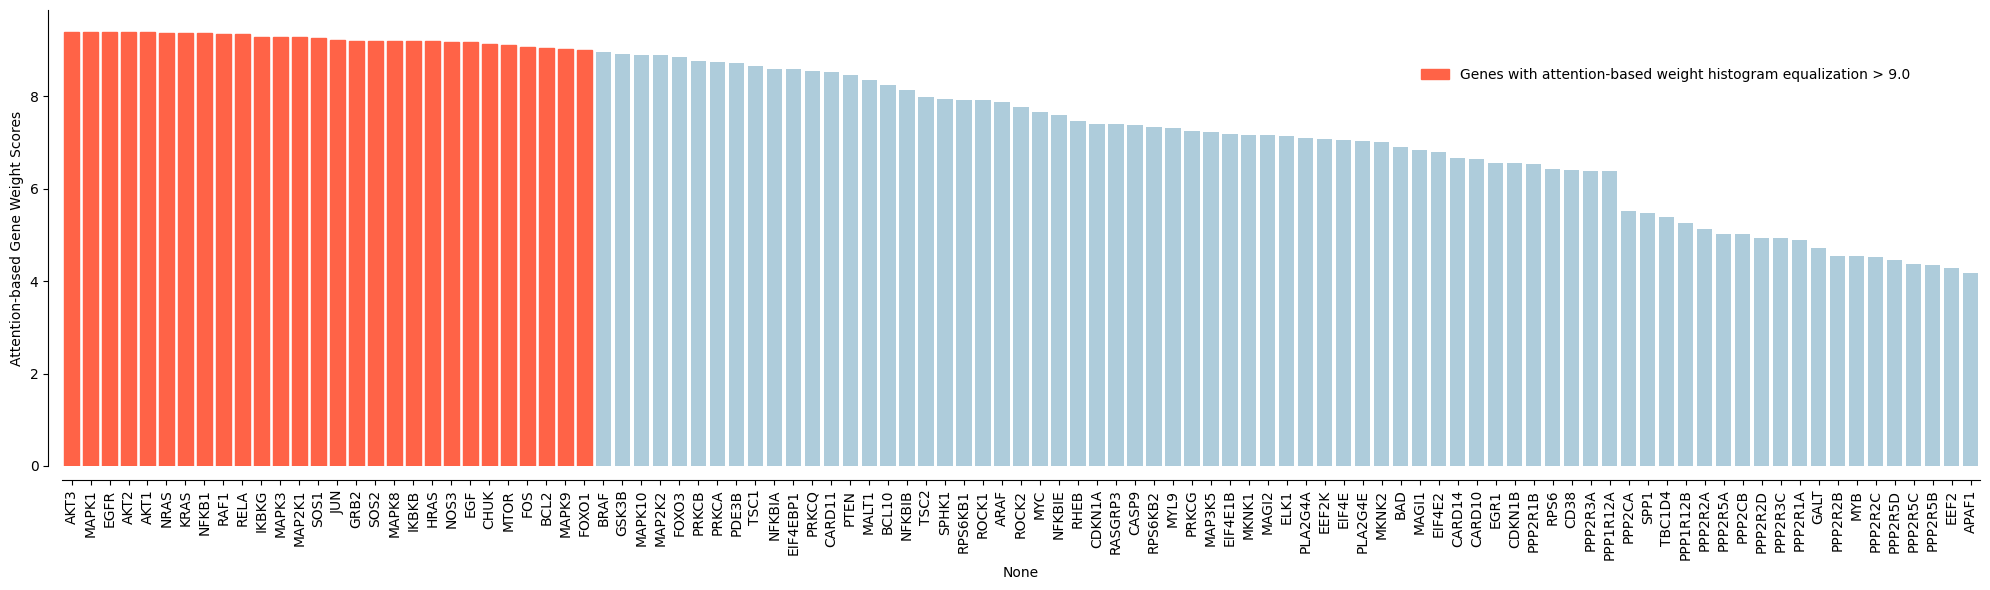

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def create_custom_barplot(dataframe, pval_col_list, save_path):
    plt.figure(figsize=(20, 6))

    # Create a horizontal bar plot for column A
    barplot = sns.barplot(y=dataframe['high_eq_Att_deg'], x=dataframe.index, color='#A6CEE3', width=0.8)  # uniform color for all bars

    # Loop through the bars and highlight the ones where conditions are met
    for idx, bar in enumerate(barplot.patches):
        # Highlight bars where attention degree is greater than 2.0
        if dataframe['high_eq_Att_deg'][idx] > 8.99:
            bar.set_color('tomato')  # Set the bar color to tomato

    # Add horizontal line at y=2.0 with tomato color, bold and dotted line
    # plt.axhline(y=2.0, color='tomato', linestyle='--', linewidth=2.5)  # Dashed line, bold (linewidth=2.5)

    # Change y-axis label
    plt.ylabel('Attention-based Gene Weight Scores')

    # Adjust the y-axis spine to bring the zero a little higher
    barplot.spines['left'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it up
    barplot.spines['left'].set_color('black')  # Change the color

    # Also adjust the x-axis spine to bring the zero a little to the left
    barplot.spines['bottom'].set_position(('outward', 10))  # Adjust 10 pixels outward to move it to the left

    # Set x-ticks with gene names
    plt.xticks(ticks=range(len(dataframe)), labels=dataframe['Gene_name'].tolist(), rotation=90)

    # Remove unnecessary spines
    sns.despine(left=False, bottom=False, top=True, right=True)

    # Create legend patches
    legend_patches = [
        # mpatches.Patch(color='#A6CEE3', label='Genes with no significant differences'),
        mpatches.Patch(color='tomato', label='Genes with attention-based weight histogram equalization > 9.0'),
        # mpatches.Patch(facecolor='none', edgecolor='#a569bd', linewidth=2.0, label='Genes with significant (p < 0.1) differences in AD vs non-AD')  # Border-only patch
    ]

    # # Create a custom legend entry for the horizontal dotted line
    # line_legend = mlines.Line2D([], [], color='tomato', linestyle='--', linewidth=2.5, label='Important genes threshold (Attention-based weight > 2.0)')

    # # Add the dotted line legend to the existing legend patches
    # legend_patches.append(line_legend)

    # Add legend to the barplot with specific location and remove the border
    barplot.legend(handles=legend_patches, 
                   loc='upper right', 
                   bbox_to_anchor=(0.97, 0.9),  # Adjust the position to control the vertical placement
                   frameon=False)  # Remove the border around the legend

    # Apply tight layout before saving
    plt.tight_layout()

    # Save the plot with high DPI and ensure the full image is saved
    plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Example of how to call the function
create_custom_barplot(AD_sort_refilter_node_weight_pval_df, pval_col_list, './avg_AD_refilter_node_weight_pval_barplot-noborder.png')

#### 1.1.2 Barplot of the vertical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

def create_custom_barplot(dataframe, pval_col_list, save_path):
    plt.figure(figsize=(7, 20))  # Adjust figure size for vertical alignment

    # Create a horizontal bar plot
    barplot = sns.barplot(x=dataframe['log_normalized_Att_deg'], y=dataframe['Gene_name'], color='#A6CEE3', orient='h', width=0.65)

    # Loop through the bars and highlight the ones where conditions are met
    for idx, bar in enumerate(barplot.patches):
        # Highlight bars where attention degree is greater than log2[3]
        if dataframe['log_normalized_Att_deg'][idx] > np.log2(1+2):
            bar.set_color('tomato')  # Set the bar color to tomato
        # Highlight bars where p-value is less than 0.1
        for pval_col in pval_col_list:
            if dataframe[pval_col][idx] < 0.1:
                bar.set_edgecolor('#a569bd')  # Add a frame color for significant p-values
                bar.set_linewidth(3.0)  # Set the width of the frame

    # Add a vertical line at x=2.0 with tomato color, bold and dotted line
    # plt.axvline(x=2.0, color='tomato', linestyle='--', linewidth=2.5)  # Dashed line, bold (linewidth=2.5)

    # Change x-axis label
    plt.xlabel('Attention-based Gene Weight Scores')

    # Move the x-axis to the top
    barplot.xaxis.set_label_position('top')
    barplot.xaxis.tick_top()

    # Adjust the spines
    barplot.spines['top'].set_position(('outward', 10))  # Move the x-axis spine outward
    barplot.spines['left'].set_position(('outward', 10))  # Adjust y-axis (left)
    barplot.spines['top'].set_color('black')  # Change the color of the x-axis

    # Remove unnecessary spines
    sns.despine(left=False, bottom=True, top=False, right=True)

    # Create legend patches
    legend_patches = [
        mpatches.Patch(color='tomato', label='Genes with attention-based weight > log2[3]'),
        mpatches.Patch(facecolor='none', edgecolor='#a569bd', linewidth=2.0, label='Genes with significant (p < 0.1) differences in AD vs non-AD')  # Border-only patch
    ]

    # Add legend inside the plot, at the bottom center, slightly above the x-axis
    barplot.legend(handles=legend_patches, 
                   loc='lower center', 
                   bbox_to_anchor=(0.6, 0.01),  # Adjust the position to be just inside the bottom of the plot
                   frameon=False,  # Remove the border around the legend
                   ncol=1)  # Make the legend a single column

    # Apply tight layout before saving
    plt.tight_layout()

    # Save the plot with high DPI and ensure the full image is saved
    plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Example of how to call the function
create_custom_barplot(AD_sort_refilter_node_weight_pval_df, pval_col_list, './avg_AD_refilter_node_weight_pval_barplot_transposed.png')


### 1.2 Heatmap of p-values for 10 omics features

In [ ]:
# Upstream
# Distal
# Proximal
# Core
# Downstream
# del
# dup
# mcnv
# gene-expression
# protein-expression

In [ ]:
pval_list_of_lists = []
pval_reversed_col_list = pval_col_list[::-1]
for pval_col in pval_reversed_col_list:
    pval_list = AD_sort_refilter_node_weight_pval_df[pval_col].tolist()
    pval_list_of_lists.append(pval_list)

#### 1.2.1 Heatmap of horizontal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm, Normalize, PowerNorm
import seaborn as sns

# Define colormap
# cmap = 'Reds_r'
cmap = 'Purples_r'


# Combine all lists into a single list for sizes and colors
all_lists = pval_list_of_lists

# Retrieve unique labels (assuming gene_node_name_list exists) without reversing
xlabels = AD_sort_refilter_node_weight_pval_df['Gene_name'].tolist()  # Keep the list in original order (high to low)
print(len(xlabels))

# Define y-axis labels for 10 gene features
ylabels = pval_reversed_col_list  # Reverse the list to show the highest feature on top
# Remove ['methy-', '_pvalues'] from ylabels
ylabels = [ylabel.replace('methy_', '') for ylabel in ylabels]
ylabels = [ylabel.replace('_pvalues', '') for ylabel in ylabels]

# Define x-label indices and y-label indices (horizontal layout)
xlabels_num_list = list(np.arange(0, len(xlabels))) * len(ylabels)
ylabels_num_list = sum([[i] * len(xlabels) for i in range(len(ylabels))], [])

# Determine the number of x and y labels
xn = len(xlabels)
yn = len(ylabels)

# Retrieve size and color information for the circles
s = np.concatenate(all_lists)
c = np.concatenate(all_lists)

# Assuming you have a dataframe column 'Att_deg' corresponding to each gene in 'xlabels'
att_deg_values = AD_sort_refilter_node_weight_pval_df['Att_deg'].tolist()  # Get 'Att_deg' values

# Preparation of the figure with its grid (horizontal layout)
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-0.5, xn - 0.5)
ax.set_ylim(-0.5, yn - 0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

# Set minor ticks for grid
ax.set_xticks(np.arange(xn) - 0.5, minor=True)
ax.set_yticks(np.arange(yn) - 0.5, minor=True)

# Add grid
ax.grid(which='minor')

ax.set_aspect("equal", "box")

# Create circles patches and colorbar
R = [0.3] * len(s)  # Set the radius of the circles
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]

norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.2)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)

# Define the binary threshold
filled_circles = np.where(c < 0.5, True, False)  # True if c < 0.1 (filled), False otherwise (empty)
# Create a PatchCollection with edgecolor
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm, edgecolor='white', linewidth=1)
# Generate face colors for the filled circles using the colormap
filled_colors = col.cmap(col.norm(c))  # Get the colormap RGBA values for all circles
# Set transparent face colors for empty circles
transparent_colors = np.zeros_like(filled_colors)  # Create an array of zeros (transparent RGBA)
# Combine filled and transparent colors using the binary condition
face_colors = np.where(filled_circles[:, None], filled_colors, transparent_colors)  # Broadcasting for RGBA values
# Apply the face colors to the PatchCollection
col.set_facecolor(face_colors)

ax.add_collection(col)

# Rotate x-axis labels
ax.tick_params(axis='x', labelrotation=90)

# Make the font size larger for both x and y labels
ax.tick_params(axis='both', labelsize=15)

# # Adjust the y-axis spine to bring the zero a little higher
# ax.spines['left'].set_position(('outward', 15))  # Adjust 10 pixels outward to move it up
# ax.spines['bottom'].set_position(('outward', 15))  # Adjust 10 pixels outward to move it to the left
# ax.spines['left'].set_color('black')  # Change the color

# Remove unnecessary spines
sns.despine(left=False, bottom=False, top=True, right=True)  # Set True to remove spine

# Set the x-axis label font color based on 'Att_deg' > 2.0
for xtick, att_deg in zip(ax.get_xticklabels(), att_deg_values):
    if att_deg > 2.0:
        xtick.set_color('#FF6347')  # Set color to tomato for genes with Att_deg > 2.0
        xtick.set_fontweight('bold')
    else:
        xtick.set_color('black')  # Otherwise, keep it black

# Add colorbar with custom ticks
cbar = fig.colorbar(col, shrink=0.1, aspect=10, orientation='horizontal', ticks=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.ax.set_xticklabels([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])  # Optionally set custom tick labels

# Apply tight layout before saving
plt.tight_layout()

# Save the plot with high DPI and ensure the full image is saved
plt.savefig('./avg_AD_refilter_node_weight_pval_circleplot.png', dpi=600, bbox_inches='tight')


#### 1.2.2 Heatmap of vertical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

# Define colormap
cmap = 'Purples_r'

# Combine all lists into a single list for sizes and colors
all_lists = pval_list_of_lists

# Retrieve unique labels (assuming gene_node_name_list exists) without reversing
ylabels = AD_sort_refilter_node_weight_pval_df['Gene_name'].tolist()  # Keep the list in original order (high to low)
print(len(ylabels))

# Define x-axis labels for 10 gene features
xlabels = pval_reversed_col_list  # Reverse the list to show the highest feature on top
# Remove ['methy-', '_pvalues'] from xlabels
xlabels = [xlabel.replace('methy_', '') for xlabel in xlabels]
xlabels = [xlabel.replace('_pvalues', '') for xlabel in xlabels]

# Define y-label indices and x-label indices (vertical layout)
ylabels_num_list = list(np.arange(0, len(ylabels))) * len(xlabels)
xlabels_num_list = sum([[i] * len(ylabels) for i in range(len(xlabels))], [])

# Determine the number of x and y labels
xn = len(xlabels)
yn = len(ylabels)

# Retrieve size and color information for the circles
s = np.concatenate(all_lists)
c = np.concatenate(all_lists)

# Assuming you have a dataframe column 'Att_deg' corresponding to each gene in 'ylabels'
att_deg_values = AD_sort_refilter_node_weight_pval_df['Att_deg'].tolist()  # Get 'Att_deg' values

# Preparation of the figure with its grid (vertical layout)
fig, ax = plt.subplots(figsize=(10, 30))  # Swap dimensions to reflect the rotated plot
ax.set_xlim(-0.5, xn - 0.5)
ax.set_ylim(yn - 0.5, -0.5)  # Invert y-axis to make labels go from top to bottom
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

# Set minor ticks for grid
ax.set_xticks(np.arange(xn) - 0.5, minor=True)
ax.set_yticks(np.arange(yn) - 0.5, minor=True)

# Add grid
ax.grid(which='minor')

ax.set_aspect("equal", "box")

# Create circles patches and colorbar
R = [0.3] * len(s)  # Set the radius of the circles
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]

norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.2)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)

# Define the binary threshold
filled_circles = np.where(c < 0.5, True, False)  # True if c < 0.1 (filled), False otherwise (empty)
# Create a PatchCollection with edgecolor
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm, edgecolor='white', linewidth=1)
# Generate face colors for the filled circles using the colormap
filled_colors = col.cmap(col.norm(c))  # Get the colormap RGBA values for all circles
# Set transparent face colors for empty circles
transparent_colors = np.zeros_like(filled_colors)  # Create an array of zeros (transparent RGBA)
# Combine filled and transparent colors using the binary condition
face_colors = np.where(filled_circles[:, None], filled_colors, transparent_colors)  # Broadcasting for RGBA values
# Apply the face colors to the PatchCollection
col.set_facecolor(face_colors)

ax.add_collection(col)

# Move x-axis labels to the top
ax.xaxis.tick_top()
# Rotate the x-axis labels by 90 degrees
ax.tick_params(axis='x', labelrotation=90)

# Make the font size larger for both x and y labels
ax.tick_params(axis='both', labelsize=11)


# Remove unnecessary spines
sns.despine(left=False, bottom=False, top=True, right=True)  # Set True to remove spine

# Set the y-axis label font color based on 'Att_deg' > 2.0
for ytick, att_deg in zip(ax.get_yticklabels(), att_deg_values):
    if att_deg > 2.0:
        ytick.set_color('#FF6347')  # Set color to tomato for genes with Att_deg > 2.0
        ytick.set_fontweight('bold')
    else:
        ytick.set_color('black')  # Otherwise, keep it black

# Add colorbar with custom ticks and place it on the right
cbar = fig.colorbar(col, shrink=0.1, aspect=10, orientation='vertical', ticks=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.ax.set_yticklabels([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])  # Optionally set custom tick labels

# Apply tight layout before saving
plt.tight_layout()

# Save the plot with high DPI and ensure the full image is saved
plt.savefig('./avg_AD_refilter_node_weight_pval_circleplot_rotated_with_yaxis_inverted.png', dpi=600, bbox_inches='tight')


## 2. Pathway enrichment analysis

### 2.1 Generate important genes

In [ ]:
# Get the gene name list from the dataframe if the att_deg larger than 2.0
important_gene_list = AD_sort_refilter_node_weight_pval_df[AD_sort_refilter_node_weight_pval_df['Att_deg'] > 2.0]['Gene_name'].tolist()
print(important_gene_list)
# Output the list to a file
with open('./important_gene_list.txt', 'w') as f:
    for gene_name in important_gene_list:
        f.write(gene_name + '\n')

### 2.2 Pathway enrichment

In [ ]:
import pandas as pd

ad_enrichment_pathway_df = pd.read_csv('./pathway_enrichment.txt', sep='\t')
display(ad_enrichment_pathway_df)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[ad_enrichment_pathway_df['FDR'] < 0.0001]
ad_enrichment_pathway_df = ad_enrichment_pathway_df[['Term', 'Genes', 'PValue', 'FDR']]

# Function to count the number of genes
def count_genes(gene_string):
    return len(gene_string.split(', '))

# Add the 'Number_of_Genes' column
ad_enrichment_pathway_df['Number_of_Genes'] = ad_enrichment_pathway_df['Genes'].apply(count_genes)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Remove the rows if the 'Term' column contains 'cancer' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('cancer', case=False)]
# Remove the rows if the 'Term' column contains 'carcinogenesis' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('carcinogenesis', case=False)]
# Remove the rows if the 'Term' column contains 'leukemia' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('leukemia', case=False)]
# Remove the rows if the 'Term' column contains 'glioma' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('glioma', case=False)]

ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Keep only the lowest 20 FDR pathways
ad_enrichment_pathway_df = ad_enrichment_pathway_df.sort_values('FDR').head(20)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)
display(ad_enrichment_pathway_df)

# Removing the colon and everything after it in the "Term" column
ad_enrichment_pathway_df['Term_num'] = ad_enrichment_pathway_df['Term'].str.split(':').str[0]
display(ad_enrichment_pathway_df)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# plot the lolipop plot but ranked from the highest to the lowest

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 7))

# Generate a sequence of numbers corresponding to the rows in your DataFrame
y = np.arange(len(ad_enrichment_pathway_df))

# Normalize the FDR values for colormap
norm = mcolors.Normalize(vmin=min(-np.log10(ad_enrichment_pathway_df['FDR'])), 
                         vmax=max(-np.log10(ad_enrichment_pathway_df['FDR'])))
cmap = cm.get_cmap('coolwarm')  # Blue to red colormap

# Assume the size of points represents the number of genes (adjust according to your data)
sizes = ad_enrichment_pathway_df['Number_of_Genes'] * 10  # Adjust

# Create horizontal lines from x=0 to the -log10(FDR) values
ax.hlines(y, 0, -np.log10(ad_enrichment_pathway_df['FDR']), color='grey')

# Plot points with colors from the colormap and sizes reflecting the number of genes
sc = ax.scatter(-np.log10(ad_enrichment_pathway_df['FDR']), y, 
                c=-np.log10(ad_enrichment_pathway_df['FDR']), cmap=cmap, s=sizes, edgecolor='black')

# Set y-axis ticks and labels to correspond to pathway names
ax.set_yticks(y)
ax.set_yticklabels(ad_enrichment_pathway_df['Term'])

# Set the x-axis label
ax.set_xlabel('-log10(FDR)')
ax.invert_yaxis()

# Set the plot title
ax.set_title('Pathway Enrichment Analysis')

# Create legend for the number of genes with only two markers (min and max)
min_size = min(ad_enrichment_pathway_df['Number_of_Genes'])
max_size = max(ad_enrichment_pathway_df['Number_of_Genes'])
size_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'{int(min_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(min_size * 10)),
    Line2D([0], [0], marker='o', color='w', label=f'{int(max_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(max_size * 10))
]

# Add the number of genes legend, positioned below the colorbar legend
ax.legend(handles=size_legend, title='Number of Genes', loc='lower right', bbox_to_anchor=(0.975, 0.18), frameon=False)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create an inset for the colorbar inside the main plot
cax = inset_axes(ax, width='30%', height='3%', loc='lower right',
                 bbox_to_anchor=(0.1, 0.05, 0.85, 0.725), bbox_transform=ax.transAxes, borderpad=0)

# Add a colorbar to represent the FDR values in the inset
cbar = plt.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_label('-log10(FDR)')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

# Adjust layout to make room for the legends
plt.subplots_adjust(right=0.7)  # Adjust this to give more space

# Display the plot
plt.show()



In [ ]:
from bioservices import KEGG

# Initialize the KEGG service
kegg = KEGG()

# Example pathway ID (you can replace 'hsa04010' with any other pathway ID)
pathway_id_list = ad_enrichment_pathway_df['Term_num'].tolist()
pathway_class_list = []

for pathway_id in pathway_id_list:
    # Retrieve the pathway information
    pathway_info = kegg.get(pathway_id)

    # Extract the pathway class
    lines = pathway_info.split("\n")
    for line in lines:
        if line.startswith("CLASS"):
            pathway_class = line.replace("CLASS       ", "").strip()
            pathway_class_list.append(pathway_class)
            # print(f"Pathway ID: {pathway_id}")
            # print(f"Pathway Class: {pathway_class}")

# Add the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class'] = pathway_class_list
display(ad_enrichment_pathway_df)

In [ ]:
# Remove the element content after the first semicolon in the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class_detail'] = ad_enrichment_pathway_df['Pathway_Class'].str.split(';').str[1]
display(ad_enrichment_pathway_df)
ad_enrichment_pathway_df.to_csv('./ad_enrichment_pathway_df.csv', index=False)

In [ ]:
import pandas as pd
import plotly.graph_objects as go


# Prepare data for the Sankey plot
labels = list(ad_enrichment_pathway_df['Pathway_Class_detail'].unique()) + list(ad_enrichment_pathway_df['Term']) + [gene for genes in ad_enrichment_pathway_df['Genes'] for gene in genes.split(', ')]

source = []
target = []
value = []

# Map overall signaling pathways to terms
for i, row in ad_enrichment_pathway_df.iterrows():
    source.append(labels.index(row['Pathway_Class_detail']))
    target.append(labels.index(row['Term']))
    value.append(1)

# Map terms to genes
for i, row in ad_enrichment_pathway_df.iterrows():
    for gene in row['Genes'].split(', '):
        source.append(labels.index(row['Term']))
        target.append(labels.index(gene))
        value.append(1)

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Update layout
fig.update_layout(title_text='Sankey Diagram: Overall Signaling Pathways to Terms to Genes', font_size=10)

# Display the plot
fig.write_html('./sankey_diagram.html')
fig.show()


In [ ]:
# Prepare data for the Sankey plot
labels = list(ad_enrichment_pathway_df['Pathway_Class_detail'].unique()) + list(ad_enrichment_pathway_df['Term']) + [gene for genes in ad_enrichment_pathway_df['Genes'] for gene in genes.split(', ')]

source = []
target = []
value = []

# Create a dictionary to track counts for each Pathway_Class_detail and Term
term_gene_counts = {row['Term']: len(row['Genes'].split(', ')) for _, row in ad_enrichment_pathway_df.iterrows()}
pathway_gene_counts = ad_enrichment_pathway_df.groupby('Pathway_Class_detail')['Genes'].apply(lambda x: sum(len(genes.split(', ')) for genes in x)).to_dict()

# Map overall signaling pathways to terms and use the sum of genes in each term for value
for i, row in ad_enrichment_pathway_df.iterrows():
    source.append(labels.index(row['Pathway_Class_detail']))
    target.append(labels.index(row['Term']))
    value.append(term_gene_counts[row['Term']])  # Value is the number of genes under each term

# Map terms to genes and use 1 for each gene connection
for i, row in ad_enrichment_pathway_df.iterrows():
    for gene in row['Genes'].split(', '):
        source.append(labels.index(row['Term']))
        target.append(labels.index(gene))
        value.append(1)  # Value is 1 for each gene connection

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='lightgrey', width=1.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Update layout
fig.update_layout(title_text='Sankey Diagram: Overall Signaling Pathways to Terms to Genes', font_size=30)

# Display the plot
fig.write_html('./sankey_diagram.html')
fig.show()
